무비렌즈

100만개 데이터 셋
-> 6000명, 4000편, 100만개 영화 평점
-> 평점, 사용자 정보, 영화 정보


In [334]:
import pandas as pd
import numpy as np
unames=['user_id','gender','age','occupation','zip_code']
rnames=['user_id','movie_id','rating','timestamp']
mnames=['movie_id','title','genres']

users=pd.read_csv("data/dataset/movielens/users.dat", sep="::", header=None, names=unames)#names=['user_id','gender','age','occupation','zip_code'])
print(users.head())
#UserID::Gender::Age::Occupation::Zip-code

ratings=pd.read_csv("data/dataset/movielens/ratings.dat", sep="::", header=None, names=rnames)
print(ratings.head())
#UserID::MovieID::Rating::Timestamp

movies=pd.read_csv("data/dataset/movielens/movies.dat", sep="::", header=None, names=mnames)
print(movies.head())
#MovieID::Title::Genres


C:\Users\B-17\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys
C:\Users\B-17\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # This is added back by InteractiveShellApp.init_path()


   user_id gender  age  occupation zip_code
0        1      F    1          10    48067
1        2      M   56          16    70072
2        3      M   25          15    55117
3        4      M   45           7    02460
4        5      M   25          20    55455
   user_id  movie_id  rating  timestamp
0        1      1193       5  978300760
1        1       661       3  978302109
2        1       914       3  978301968
3        1      3408       4  978300275
4        1      2355       5  978824291
   movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy


C:\Users\B-17\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


In [335]:
#users.columns=['user_id','gender','age','occupation','zip_code']
users[:5]
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [336]:
data=pd.merge(users, ratings, how="inner", on=['user_id'])
data=pd.merge(data, movies, how='inner', on='movie_id')
data.info()
data.loc[0]

#iloc(정수 위치), loc(라벨), ix

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
user_id       1000209 non-null int64
gender        1000209 non-null object
age           1000209 non-null int64
occupation    1000209 non-null int64
zip_code      1000209 non-null object
movie_id      1000209 non-null int64
rating        1000209 non-null int64
timestamp     1000209 non-null int64
title         1000209 non-null object
genres        1000209 non-null object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


user_id                                            1
gender                                             F
age                                                1
occupation                                        10
zip_code                                       48067
movie_id                                        1193
rating                                             5
timestamp                                  978300760
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [337]:
#성별에 따른 각 영화의 평점.
data.groupby(['gender','movie_id'])['rating'].mean()


gender  movie_id
F       1           4.187817
        2           3.278409
        3           3.073529
        4           2.976471
        5           3.212963
        6           3.682171
        7           3.588235
        8           3.357143
        9           2.100000
        10          3.470149
        11          3.923483
        12          2.892857
        13          3.642857
        14          3.750000
        15          3.200000
        16          3.609023
        17          4.233333
        18          3.222222
        19          2.269663
        20          2.600000
        21          3.597902
        22          3.443396
        23          2.894737
        24          3.079710
        25          3.458194
        26          3.562500
        27          2.947368
        28          4.132743
        29          4.073529
        30          3.875000
                      ...   
M       3923        2.620253
        3924        2.764706
        3925        3.8080

In [338]:
mean_ratings=data.pivot_table("rating", index='title', columns='gender', aggfunc='mean') #aggfunc:: default = mean
mean_ratings

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
1-900 (1994),2.000000,3.000000
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215


In [339]:
import nltk
#nltk.download()
#자연어 처리 : 데이터를 토큰화 -> 정제 -> 정규화
# 토큰화 : 문장을 단어로 나누는 작업
# ex. How are you? -> How / are / you
# 정제 : 특수문자(.,/?등)를 제거하는 작업
# ex. Don't 을 정제할때 어퍼스트로피를 제거하면 안됨!(이 점을 유의해서 정제해야됨.)
from nltk.tokenize import word_tokenize
print(word_tokenize("Clean Slate (Coup de Torchon) (1981)"))

['Clean', 'Slate', '(', 'Coup', 'de', 'Torchon', ')', '(', '1981', ')']


In [340]:
#print(word_tokenize("Don't be folled by the dark sounding name. Mr.Jone's"))

In [341]:
#영화 제목으로 그룹화 -> size로 평점의 개수를 파악해 보자!

rating_by_title=data.groupby('title').size()
rating_by_title[:10]

#250건 평점 정보가 있는 영화만 추출
active_titles=rating_by_title.index[ rating_by_title >= 250 ]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [342]:
#250건 이상 리뷰가 존재하는 영화의 성별에 따른 평점
mean_ratings.loc[active_titles]

#여성에게 높은 평점을 받은 영화 목록을 출력(상위 10개)
top_female_ratings=mean_ratings.sort_index(by='F', ascending=False)
top_female_ratings[:10] #F열을 기준으로 내림차순을 한 후에 상위 10개만 뽑음.


C:\Users\B-17\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """


gender,F,M
title,,
Clean Slate (Coup de Torchon) (1981),5.0,3.857143
"Ballad of Narayama, The (Narayama Bushiko) (1958)",5.0,3.428571
Raw Deal (1948),5.0,3.307692
Bittersweet Motel (2000),5.0,NaN
Skipped Parts (2000),5.0,4.000000
Lamerica (1994),5.0,4.666667
"Gambler, The (A J�t�kos) (1997)",5.0,3.166667
"Brother, Can You Spare a Dime? (1975)",5.0,3.642857
Ayn Rand: A Sense of Life (1997),5.0,4.000000


In [343]:
#mean_ratings에 저장되어 있는 값을 사용해서 
# 남녀간 평균평점의 차이가 가장 큰 영화가 무엇인지 찾아보자 (상위 5개만 출력)
mean_ratings['diff']=abs(mean_ratings['F']-mean_ratings['M']) #diff열을 남녀간의 평점 차이로 새로 만든다.
mean_ratings.sort_index(by='diff', ascending=False)[:5] #상위 5개만 출력한다.
sorted_by_diff=mean_ratings.sort_values(by='diff', ascending=False) #value로 sort
sorted_by_diff[:15]


C:\Users\B-17\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  after removing the cwd from sys.path.


gender,F,M,diff
title,,,
Tigrero: A Film That Was Never Made (1994),1.000000,4.333333,3.333333
"Spiders, The (Die Spinnen, 1. Teil: Der Goldene See) (1919)",4.000000,1.000000,3.000000
"Neon Bible, The (1995)",1.000000,4.000000,3.000000
"James Dean Story, The (1957)",4.000000,1.000000,3.000000
Country Life (1994),5.000000,2.000000,3.000000
"Enfer, L' (1994)",1.000000,3.750000,2.750000
Babyfever (1994),3.666667,1.000000,2.666667
Stalingrad (1993),1.000000,3.593750,2.593750
"Woman of Paris, A (1923)",5.000000,2.428571,2.571429


In [344]:
sorted_by_diff[::-1][:15] #역순으로 재 정렬한 다음에 상위 15개를 뽑음.

gender,F,M,diff
title,,,
Zero Kelvin (Kj�rlighetens kj�tere) (1995),NaN,3.500000,NaN
Zachariah (1971),NaN,3.500000,NaN
Year of the Horse (1997),NaN,3.250000,NaN
"Wooden Man's Bride, The (Wu Kui) (1994)",NaN,3.000000,NaN
With Friends Like These... (1998),NaN,4.000000,NaN
With Byrd at the South Pole (1930),NaN,2.000000,NaN
Wings of Courage (1995),NaN,3.000000,NaN
Windows (1980),NaN,1.000000,NaN
Wild Bill (1995),NaN,3.146341,NaN


In [345]:
rating_std_by_title=data.groupby('title')['rating'].std() #영화 제목별 rating에 대한 표준편차를 구함.
rating_std_by_title.sort_values(ascending=False)[:10]

title
Foreign Student (1994)                                             2.828427
Criminal Lovers (Les Amants Criminels) (1999)                      2.309401
Identification of a Woman (Identificazione di una donna) (1982)    2.121320
Sunset Park (1996)                                                 2.121320
Eaten Alive (1976)                                                 2.121320
Neon Bible, The (1995)                                             2.121320
Talk of Angels (1998)                                              2.121320
Tokyo Fist (1995)                                                  2.121320
Paralyzing Fear: The Story of Polio in America, A (1998)           2.121320
Better Living (1998)                                               2.121320
Name: rating, dtype: float64

In [346]:
# 이름 데이터 분석
# 1) 시대별로 특정이름이 차지하는 비율 => 얼마나 흔한 이름인지 알아보자
# 2) 이름의 상대 순위
# 3) 각 연도별 가장 인기 있는 이름, 빈도가 높거나 낮은 이름 확인
# 4) 모음, 자음, 길이, 다양성, 철자의 변화, 첫 글자, 마지막 글자 등 이름 유행을 분석해 보자.

#최소 5명 이상에게 부여된 이름만 저장되어 있는 데이터셋임.

names1880=pd.read_csv("data/dataset/babynames/yob1880.txt", names=['name','sex','births'])
print(names1880[:10])

#성별 출생수의 합
print(names1880.groupby('sex').sum())



        name sex  births
0       Mary   F    7065
1       Anna   F    2604
2       Emma   F    2003
3  Elizabeth   F    1939
4     Minnie   F    1746
5   Margaret   F    1578
6        Ida   F    1472
7      Alice   F    1414
8     Bertha   F    1320
9      Sarah   F    1288
     births
sex        
F     90993
M    110493


In [347]:
names2010=pd.read_csv("data/dataset/babynames/yob2010.txt", names=['name','sex','births'])
print(names2010[:10])

       name sex  births
0  Isabella   F   22731
1    Sophia   F   20477
2      Emma   F   17179
3    Olivia   F   16860
4       Ava   F   15300
5     Emily   F   14172
6   Abigail   F   14124
7   Madison   F   13070
8     Chloe   F   11656
9       Mia   F   10541


In [348]:
years=range(1880, 2011)

pieces=[]
for year in years:
    #data/dataset/babynames/yob2010.txt
    path="data/dataset/babynames/yob%d.txt"%year
    frame=pd.read_csv(path, names=['name','sex','births'])
    frame['year']=year
    pieces.append(frame)
len(pieces) #datafreme이 list형태로 저장됨.
names=pd.concat(pieces,ignore_index=True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


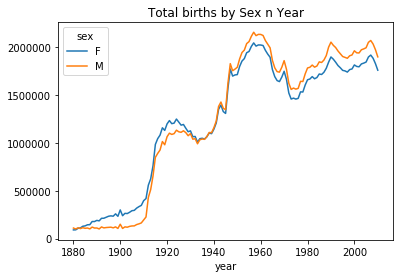

In [349]:
#연도별 성별 출생수의 합을 출력
total_births=names.pivot_table('births', index='year', columns='sex', aggfunc="sum")
total_births.plot(title="Total births by Sex n Year")

In [350]:
#prop 열 추가 :: 각 이름이 전체 출생수에서 차지하는 비율
# ex. prop값이 0.02 -> 100명중 2명이 같은 이름이다.

def add_prop(group):
    births=group.births.astype(float)
    group['prop']=births/births.sum() # 이름의 인원 수/해당 연도의 인원수
    return group

names=names.groupby(['year', 'sex']).apply(add_prop)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [351]:
# 각 연도별 성별에 따른 빈도수가 가장 높은 이름 1000개 추출
pieces=[]
for year, group in names.groupby(['year','sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
    top1000=pd.concat(pieces,ignore_index=True)
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [352]:
boys=top1000[top1000.sex=='M']
girls=top1000[top1000.sex=='F']
print(boys, girls)

             name sex  births  year      prop
942          John   M    9655  1880  0.087381
943       William   M    9533  1880  0.086277
944         James   M    5927  1880  0.053641
945       Charles   M    5348  1880  0.048401
946        George   M    5126  1880  0.046392
947         Frank   M    3242  1880  0.029341
948        Joseph   M    2632  1880  0.023821
949        Thomas   M    2534  1880  0.022934
950         Henry   M    2444  1880  0.022119
951        Robert   M    2416  1880  0.021866
952        Edward   M    2364  1880  0.021395
953         Harry   M    2152  1880  0.019476
954        Walter   M    1755  1880  0.015883
955        Arthur   M    1599  1880  0.014472
956          Fred   M    1569  1880  0.014200
957        Albert   M    1493  1880  0.013512
958        Samuel   M    1024  1880  0.009268
959         David   M     869  1880  0.007865
960         Louis   M     828  1880  0.007494
961           Joe   M     731  1880  0.006616
962       Charlie   M     730  188

In [354]:
# John 과 Mary 이름의 추이를 시각화.
total_births=top1000.pivot_table('births', index='year', columns='name', aggfunc="sum")
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


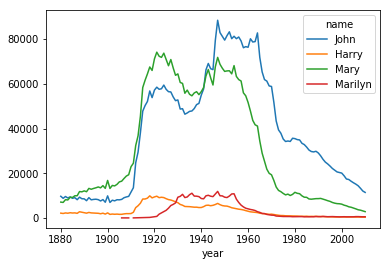

In [355]:
subset=total_births[['John','Harry','Mary','Marilyn']]
subset.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A00E153A58>,
      dtype=object)

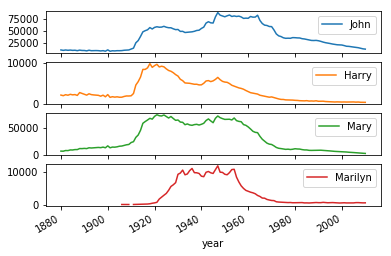

In [356]:
subset=total_births[['John','Harry','Mary','Marilyn']]
subset.plot(subplots=True)

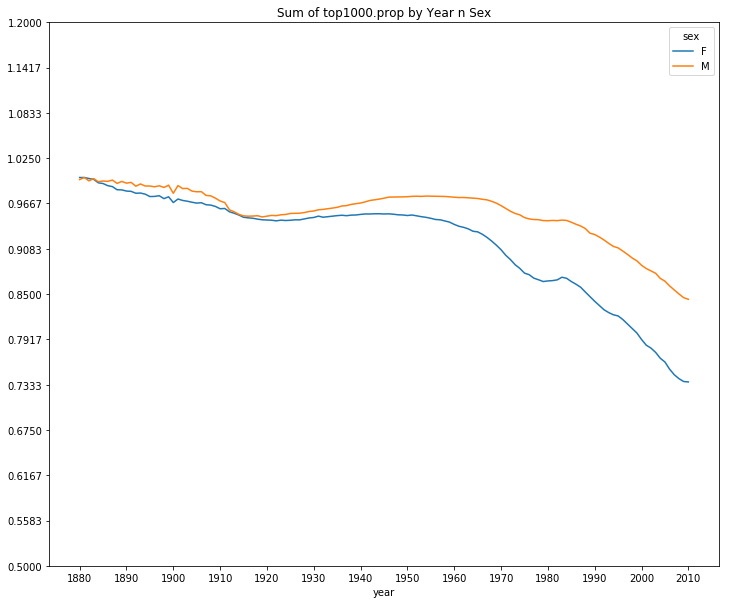

In [357]:

# 이름 1000개가 전체 출생수에서 차지하는 비율
table=top1000.pivot_table('prop', index='year', columns='sex', aggfunc="sum")
table.plot(title="Sum of top1000.prop by Year n Sex", xticks=range(1880,2011,10),figsize=(12,10), yticks=np.linspace(0.5,1.2,13)) 
#과거에는 이름의 종류가 다양하지 않았다.
#그레프를 통해 여성의 이름이 남성의 이름보다 다양하다는 것을 알 수 있었다.


In [358]:
df=boys[boys['year']==2010]
#df에 저장된 이름을 정렬했을 때, 전체 출생수의 50%를 차지하기 까지 등장하는 이름의 개수는?

df.sort_values(by='prop', ascending=False)

sum=0; cnt=0
for i in range(len(df)):
    sum+=df.iloc[i].prop
    if sum>= 0.5: break
    cnt+=1
print(cnt)

prop_cumsum=df.sort_values(by='prop', ascending=False).prop.cumsum() # cumsum :: dataframe에서 누적합을 구할때 사용하는 함수
prop_cumsum[:117]
prop_cumsum.values.searchsorted(0.5) #0.5가 넘어가는 지점의 인덱스를 반환.

116


116

In [359]:
prop_cumsum.values.searchsorted(0.5)+1 #과반수(50%)를 넘겼을 때 서로 다른 이름의 개수

117

In [360]:
#1900년에 대해서 50%를 넘겼을 때 서로다른 이름의 개수가 몇개인지 찾아라
df1900=boys[boys['year']==1900]
prop_cumsum1900=df1900.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum1900.values.searchsorted(0.5)+1


25

In [361]:
# 연도와 성별을 그룹화하고, 각 그룹에 대해 위 연산을 적용
top1000.groupby(['year','sex'])['prop']

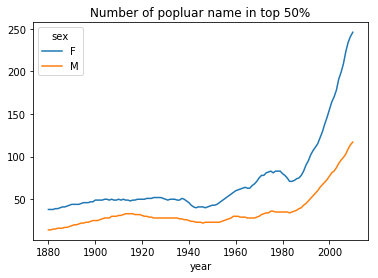

In [362]:
%matplotlib inline
import matplotlib.pyplot as plt
def getM(group):
    temp=group.sort_values(by='prop',ascending=False).prop.cumsum()
    return temp.values.searchsorted(0.5)+1


def get_quantile_count(group, q=0.5):
    group=group.sort_values(by='prop', ascending=False).prop.cumsum()
    return group.values.searchsorted(q)+1
    
#temp=top1000.pivot_table('prop', index='year', columns='sex', aggfunc=getM)
diversity=top1000.groupby(['year','sex']).apply(get_quantile_count) #위의 pivot_table로 수행한 결과와 같은 결과가 나옴
#시각화 : x축은 year, y축은 인원수(50%), 범례 : 성별
diversity=diversity.unstack('sex')
diversity.plot(title="Number of popluar name in top 50%")

# 주제 : 다양성을 높이는 요인에 대한 분석(대체되는 철자의 증가 등)

In [364]:
#이름에서 마지막글자 추출하는 함수
get_last_letter=lambda x: x[-1]
myname='gildong'
#get_last_letter(myname)
last_letters=names.name.map(get_last_letter) #map함수를 사용해서 한번에 넘겨줌.
last_letters.name='last_letter'
print(last_letters)
print(names.info())
table=names.pivot_table('births', index=last_letters, columns=['sex','year'], aggfunc="sum")
#table=names.pivot_table('births', index=last_letters, columns=['sex','year'], aggfunc=sum)
table


0          y
1          a
2          a
3          h
4          e
5          t
6          a
7          e
8          a
9          h
10         e
11         a
12         a
13         e
14         a
15         a
16         a
17         e
18         e
19         e
20         e
21         l
22         e
23         e
24         e
25         a
26         e
27         h
28         e
29         e
          ..
1690754    n
1690755    n
1690756    n
1690757    n
1690758    l
1690759    n
1690760    a
1690761    o
1690762    h
1690763    i
1690764    h
1690765    n
1690766    r
1690767    n
1690768    n
1690769    n
1690770    n
1690771    i
1690772    n
1690773    b
1690774    e
1690775    t
1690776    n
1690777    r
1690778    n
1690779    e
1690780    e
1690781    s
1690782    n
1690783    x
Name: last_letter, Length: 1690784, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 5 columns):
name      1690784 non-null object
sex       1

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4784.0   5567.0   5701.0   6602.0   6624.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2911.0   3527.0   3848.0   4808.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3576.0   3837.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2039.0   2127.0   2524.0   
t             2152.0   2165.0   2399.0   2554.0   2825.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10469.0  10404.0  12145.0  12063.0  13917.0  13927.0  14936.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                       ...            M            \
year            1887     1888     1889    ...         2001      2002   
last_letter                               ...                          
a            48942.0  59442.0  58631.0    ...      39124.0   38815.0   
b                NaN      NaN      NaN    ...      50950.0   49284.0   
c                NaN      NaN      NaN    ...      27113.0   27238.0   
d             1027.0   1298.0   1374.0    ...      60838.0   55829.0   
e            54353.0  66750.0  66663.0    ...     145395.0  144651.0   
f                NaN      NaN      NaN    ...       1758.0    1817.0   
g               25.0     44.0     28.0    ...       2151.0    2084.0   
h             7141.0   8630.0   8826.0    ...      85959.0   88085.0   
i              105.0    141.0    134.0    ...      20980.0   23610.0   
j                NaN      NaN      NaN    ...       1069.0    1088.0   
k               19.0     21.0     22.0    ...      42477.0   42043.0   
l             6175.0   7900.0   8395.0    ...     153648.0  153493.0   
m               90.0    123.0    137.0    ...      41967.0   42663.0   
n             5512.0   6833.0   7103.0    ...     616099.0  630322.0   
o               97.0    134.0    142.0    ...      82146.0   83180.0   
p                NaN      NaN      NaN    ...       3419.0    3157.0   
q                NaN      NaN      NaN    ...        602.0     618.0   
r              910.0   1207.0   1214.0    ...     165377.0  164821.0   
s             2803.0   3582.0   3569.0    ...     143791.0  139595.0   
t             3140.0   3816.0   3784.0    ...      47688.0   44991.0   
u              476.0    541.0    469.0    ...       1833.0    1819.0   
v        

In [365]:
subtable=table.reindex(columns=[1910,1960,2010], level='year')
letter_prop=subtable/subtable.sum().astype(float)

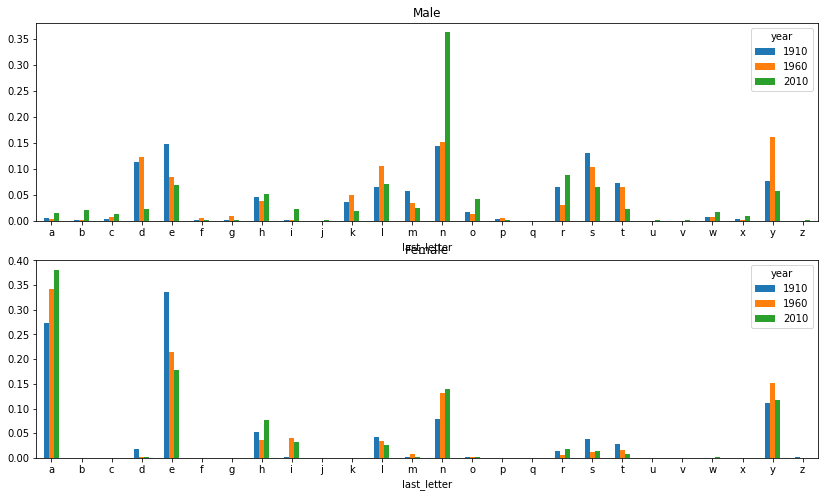

In [366]:
#이름의 마지막 글자 비율을 각 성별에 따라 연도별로 시각화
fig, axes=plt.subplots(2,1,figsize=(14,8))
letter_prop['M'].plot(kind='bar', ax=axes[0], title="Male", rot=0)
letter_prop['F'].plot(kind='bar', ax=axes[1], title="Female", rot=0)

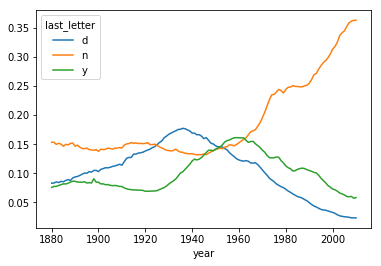

In [377]:
letter_prob=table/table.sum()
#letter_prob에서 남자 중 d, n, y로 끝나는 이름에 해당하는 데이터 추출
dny_ts=letter_prob.loc[['d','n','y'],'M'].T
dny_ts.head()
dny_ts.plot() #d/n/y로 끝나는 남자아이들의 출생 비율을 확인해볼수 있다.

In [385]:
#남자 이름과 여자 이름이 바뀐 경우
all_names=top1000.name.unique()
len(all_names)
# lesley, leslie등 lesl로 시작하는 이름을 추출
mask=np.array(['lesl' in x.lower() for x in all_names])
mask #이름에 lesl이 들어가 있으면 true, 아니면 False가 출력됨.

lesley_like=all_names[mask]
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

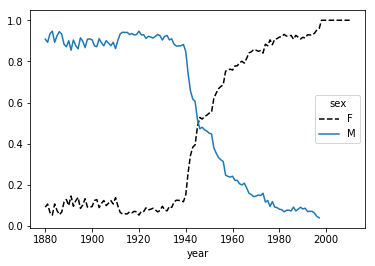

In [397]:
#5개의 이름별로 출생수를 구하자. 상대도수도 확인
top1000.name
filtered=top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

#성별과 연도별로 데이터 모음
table=filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')
table=table.div(table.sum(1), axis=0) 
#axis=0이므로 열을 더한다.
#성별과 연도별로 데이터를 모은 다음 출생 연도로 정규화를 함.
#1880년의 경우 : F: 8.0 ,M:79인데, table.div(table.sum(1), axis=0) 를 수행하면
#정규화를 하게됨. 따라서 8/(8+79)=0.1, 79/(8+79)=0.9
table.plot(style={'F':'k--'})

In [388]:
# isin() :: 열이 list의 값들을 포함하고 있는 모든 행을 추출할 때 사용
df=pd.DataFrame({"A":[1,2,3], "B":['a','b','f']})
df.isin([1,3,12,'a'])

,A,B
0,True,True
1,False,False
2,True,False
